# Advanced Data Analysis
This notebook performs advanced data analysis, including statistical tests, correlation matrix visualization, and recursive feature elimination (RFE).

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load your data
df = pd.read_csv('C:\\Users\\saife\\OneDrive\\Desktop\\Graduation\\data\\processed\\data_after_preprocessing.csv')
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,BalanceToSalary,ProductsPerTenure,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1,1,2,DIAMOND,464,-0.035804,-0.016781,False,False,False
1,-0.440036,0.198164,-1.387538,0.117350,1,0,1,0.216534,0,1,3,DIAMOND,456,-0.028930,0.967674,False,True,False
2,-1.536794,0.293517,1.032908,1.333053,3,1,0,0.240687,1,1,3,DIAMOND,377,-0.022868,-0.262894,False,False,False
3,0.501521,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0,0,5,GOLD,350,-0.035804,2.936584,False,False,False
4,2.063884,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0,0,5,GOLD,425,-0.021154,-0.016781,False,True,False


## Perform Statistical Tests
Conduct t-tests for numerical features and chi-squared tests for categorical features.

In [4]:
def perform_statistical_tests(df):
    numerical_features = df.select_dtypes(include=np.number).columns.tolist()
    for feature in numerical_features:
        if feature != 'Exited':
            churned = df[df['Exited'] == 1][feature]
            not_churned = df[df['Exited'] == 0][feature]
            t_stat, p_val = stats.ttest_ind(churned, not_churned, nan_policy='omit')
            print(f'{feature}: t-stat={t_stat:.2f}, p-value={p_val:.4f}')

    categorical_features = df.select_dtypes(include='object').columns.tolist()
    for feature in categorical_features:
        if feature != 'Exited':
            contingency = pd.crosstab(df[feature], df['Exited'])
            chi2, p, dof, ex = stats.chi2_contingency(contingency)
            print(f'{feature}: chi2={chi2:.2f}, p-value={p:.4f}')

# Example usage
perform_statistical_tests(df)

CreditScore: t-stat=-2.68, p-value=0.0074
Age: t-stat=29.76, p-value=0.0000
Tenure: t-stat=-1.37, p-value=0.1721
Balance: t-stat=11.94, p-value=0.0000
NumOfProducts: t-stat=-4.77, p-value=0.0000
HasCrCard: t-stat=-0.70, p-value=0.4855
IsActiveMember: t-stat=-15.83, p-value=0.0000
EstimatedSalary: t-stat=1.25, p-value=0.2117
Complain: t-stat=1073.80, p-value=0.0000
Satisfaction Score: t-stat=-0.58, p-value=0.5586
Point Earned: t-stat=-0.46, p-value=0.6435
BalanceToSalary: t-stat=2.56, p-value=0.0106
ProductsPerTenure: t-stat=-0.43, p-value=0.6669
Card Type: chi2=5.05, p-value=0.1679


## Correlation Matrix
Visualize the correlation matrix to identify relationships between numerical features.

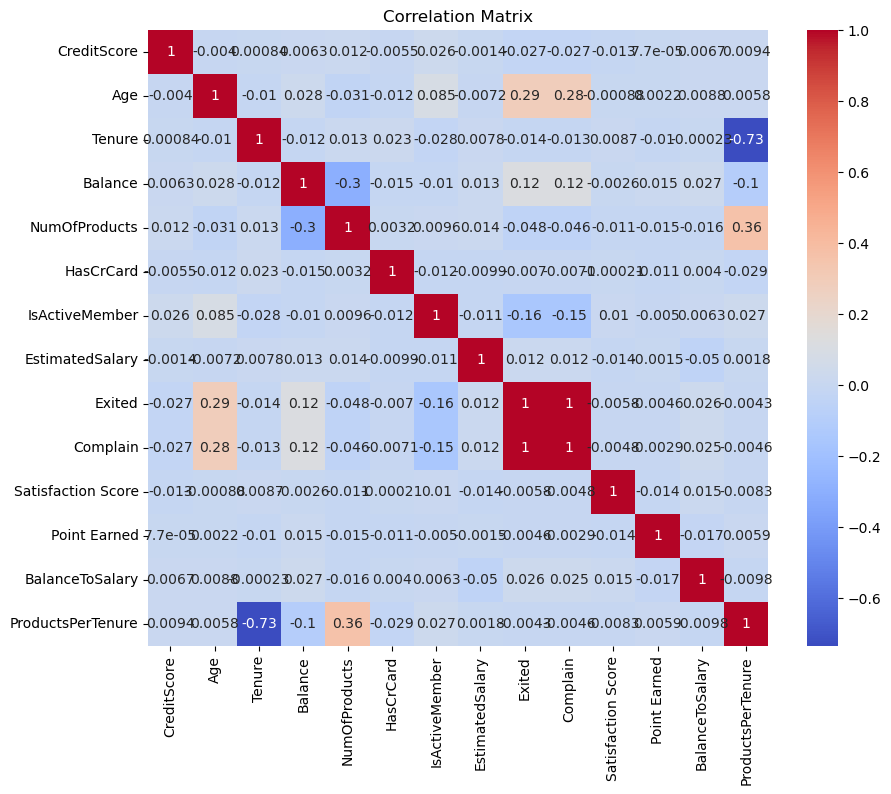

In [6]:
def plot_correlation_matrix(df):
    numerical_df = df.select_dtypes(include=np.number)  # Select only numerical columns
    corr = numerical_df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

# Example usage
plot_correlation_matrix(df)

## Recursive Feature Elimination (RFE)
Use RFE to identify the most relevant features for churn prediction.

In [8]:
def perform_rfe(df):
    X = df.drop('Exited', axis=1).select_dtypes(include=np.number)
    y = df['Exited']
    model = LogisticRegression(max_iter=1000)
    rfe = RFE(model, n_features_to_select=5)
    fit = rfe.fit(X, y)
    print('Selected Features:')
    print(X.columns[fit.support_])

# Example usage
perform_rfe(df)

Selected Features:
Index(['Age', 'NumOfProducts', 'IsActiveMember', 'Complain',
       'BalanceToSalary'],
      dtype='object')
